In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [22]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [23]:
#podstawowe parametry
att_yes = df.loc[df['Attrition'] == "Yes"]
att_no = df.loc[df['Attrition'] == "No"]

In [24]:
#przedzialy
powyzej1 = df.loc[df['DistanceFromHome'] >= 1]
ponizej5 = df.loc[df['DistanceFromHome'] <= 5]
powyzej6 = df.loc[df['DistanceFromHome'] >= 6]
ponizej11 = df.loc[df['DistanceFromHome'] <= 11]
powyzej12 = df.loc[df['DistanceFromHome'] >= 12]
ponizej17 = df.loc[df['DistanceFromHome'] <= 17]
powyzej18 = df.loc[df['DistanceFromHome'] >= 18]
ponizej22 = df.loc[df['DistanceFromHome'] <= 22]
powyzej23 = df.loc[df['DistanceFromHome'] >= 23]
ponizej28 = df.loc[df['DistanceFromHome'] <= 28]

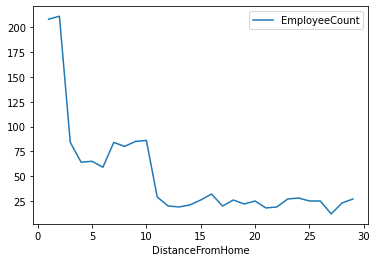

In [25]:
group = df[['DistanceFromHome', 'EmployeeCount']].groupby(by = 'DistanceFromHome').count()
group['DistanceFromHome'] = group.index.get_level_values('DistanceFromHome')

wykres = group.plot("DistanceFromHome", "EmployeeCount")

In [26]:
df["DistanceFromHome"].describe()
#min = 1 km
#max = 29 km

count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

In [27]:
slider_distance = widgets.FloatSlider(
    value=14,
    min=1,
    max=29,
    step=1,
    description='Distance to work: ',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)
slider_distance

FloatSlider(value=14.0, continuous_update=False, description='Distance to work: ', max=29.0, min=1.0, readout_…

In [28]:
a = int(slider_distance.value)
b = 'DistanceFromHome'

spraw = df.loc[df[b] == a]
sum_spraw = spraw + att_yes
sprawdz = sum_spraw['EmployeeCount'].count()

if sprawdz == 0:
    if  23 <= a <= 28:
        zm = (ponizej28 + powyzej23)
    elif 18 <= a <= 22:
        zm = (ponizej22 + powyzej18)
    elif 12 <= a <= 17:
        zm = (ponizej17 + powyzej12)
    elif 6 <= a <= 11:
        zm = (ponizej11 + powyzej6)
    elif 1 <= a <= 5:
        zm = (ponizej5 + powyzej1)
elif sprawdz != 0:
    zm = df.loc[df[b] == a] 
    
sum_yes = zm + att_yes
sum_no = zm + att_no
sum_all = sum_yes['EmployeeCount'].count() + sum_no['EmployeeCount'].count()
prob = sum_yes['EmployeeCount'].count() / sum_all
print("The probability of leaving the company with given distance from home: {0} [km] is: {1}.".format(a,prob))

The probability of leaving the company with given distance from home: 14 [km] is: 0.19047619047619047.


In [31]:
# Crosstab
DFH = pd.crosstab(df["Attrition"], df["DistanceFromHome"]) 
DFH

DistanceFromHome,1,2,3,4,5,6,7,8,9,10,...,20,21,22,23,24,25,26,27,28,29
Attrition,,,,,,,,,,,,,,,,,,,,,
No,182,183,70,55,55,52,73,70,67,75,...,21,15,13,22,16,19,22,9,21,22
Yes,26,28,14,9,10,7,11,10,18,11,...,4,3,6,5,12,6,3,3,2,5


In [34]:
# Count the employees that left the company
df_DFH_YES_only = att_yes.groupby(by="DistanceFromHome").count() ["Attrition"].reset_index()
# Change the name of column Attrition -> Atttrition_YES
df_DFH_YES_only = df_DFH_YES_only.rename(columns = {"Attrition":"Attrition_YES"})
#df_DFH_YES_only

In [37]:
# Count the employees that stayed in a company
df_DFH_NO_only = att_no.groupby(by="DistanceFromHome").count() ["Attrition"].reset_index()
# Change the name of column Attrition -> Atttrition_NO
df_DFH_NO_only = df_DFH_NO_only.rename(columns = {"Attrition":"Attrition_NO"})
#df_DFH_NO_only

In [41]:
# Merge tables with trainings and attrition both YES and NO
df_DFH_Y_N = pd.merge(df_DFH_YES_only, df_DFH_NO_only, on="DistanceFromHome", how="left")
# Reset index
df_DFH_Y_N.reset_index()
# Add a column with total number of employees
df_DFH_Y_N["Yes+No"] = df_DFH_Y_N["Attrition_YES"] + df_DFH_Y_N["Attrition_NO"]
# Add a column with probability of leaving a company
df_DFH_Y_N["Probability_YES"] = df_DFH_Y_N["Attrition_YES"]/df_DFH_Y_N["Yes+No"]
#print(df_DFH_Y_N)

In [54]:
from IPython.display import display
from ipywidgets import HBox, Label

DFH_slider = widgets.IntSlider(
    value=1,
    min=1,
    max=29,
    step=1,
    description='',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

# display(DFH_slider)
HBox([Label('Distance from home:'), DFH_slider])



In [65]:
# Slider connected with value_handler function returning probability

def val_handler(v):
    DFH = DFH_slider.value
    probab = df_DFH_Y_N.loc[df_DFH_Y_N["DistanceFromHome"]==DFH, "Probability_YES"]
        
    print("Prawdopodobieństwo odejścia z firmy wynosi: {}".format(probab[DFH]))


widgets.interact(val_handler, v = DFH_slider)

interactive(children=(IntSlider(value=16, continuous_update=False, description='v', max=29, min=1), Output()),…

<function __main__.val_handler(v)>